In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn import datasets
from math import sqrt

import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.optimize as opt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_style("ticks")
%matplotlib inline

In [2]:
hd_df = pd.read_csv('../data/heart.csv')

In [3]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
x_values = hd_df[['fbs', 'chol', 'restecg', 'trestbps']]
y_values = hd_df["target"]

In [45]:
# Data Split
seed = 1234
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=seed)

In [46]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [47]:
univariate = f_classif(x_train, y_train)
univariate

(array([ 0.35002431,  1.50519207,  4.02388456,  4.58473731]),
 array([ 0.55465623,  0.22107639,  0.04598262,  0.03326557]))

In [48]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=False, inplace=True)

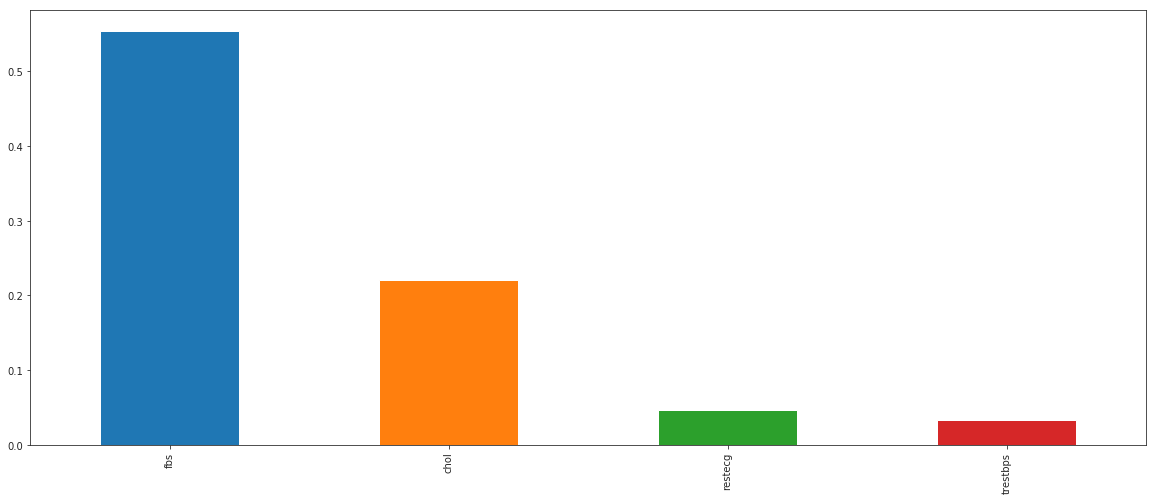

In [49]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [50]:
x_train = x_train
x_test = x_test[['fbs', 'chol', 'restecg', 'trestbps']]

In [51]:
def print_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred=y_pred)
    sns.heatmap(cm, annot=True)
    target_names = ['0', '1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    
    
    total1=sum(sum(cm))

    print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)))

    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : {0}'.format(sensitivity1))

    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : {0}'.format(specificity1))
   

def plot_roc(y_test, y_pred, model):
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.plot(fpr, tpr, marker='.', label = 'AUC: %0.2f' % auc, color= 'green')
    plt.title('{0} (ROC + AUC)'.format(model))
    plt.xlabel('False Positive Rate (x)')
    plt.ylabel('True Positive Rate (y)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [52]:
model = GaussianNB()
model.fit(x_train, y_train)
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(model,x_values,y_values,scoring='roc_auc', cv=3)
# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {0}".format(np.mean(cv_scores)))
y_pred = model.predict(x_test)

[ 0.50928854  0.51660079  0.54664032]
Average 5-Fold CV Score: 0.5241765480895917


              precision    recall  f1-score   support

           0       0.57      0.46      0.51        28
           1       0.61      0.70      0.65        33

   micro avg       0.59      0.59      0.59        61
   macro avg       0.59      0.58      0.58        61
weighted avg       0.59      0.59      0.58        61

Accuracy: 0.5901639344262295
Sensitivity : 0.4642857142857143
Specificity : 0.696969696969697


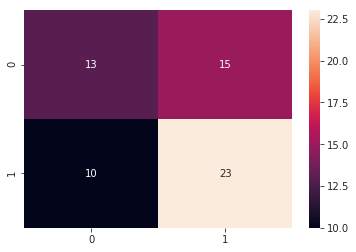

In [53]:
print_metrics(y_test, y_pred)

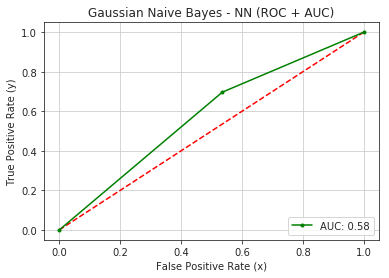

In [54]:
plot_roc(y_test, y_pred, 'Gaussian Naive Bayes - NN')

---

In [57]:
from scipy.stats import zscore

nx_values = hd_df.drop(columns=["target"]).apply(zscore)
ny_values = hd_df["target"]

In [58]:
nx_train, nx_test, ny_train, ny_test = train_test_split(nx_values, ny_values, test_size=0.2, random_state=seed)

In [62]:
lr_model = GaussianNB()
lr_model.fit(nx_train, ny_train)
# Compute 5-fold cross-validation scores: cv_scores
%time cv_scores = cross_val_score(lr_model,nx_train, ny_train,scoring='roc_auc', cv=3)
# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {0}".format(np.mean(cv_scores)))
y_pred = lr_model.predict(nx_test)

CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 25.6 ms
[ 0.8531941   0.96191646  0.9135101 ]
Average 5-Fold CV Score: 0.9095402220402221


              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

   micro avg       0.72      0.72      0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

Accuracy: 0.7213114754098361
Sensitivity : 0.6785714285714286
Specificity : 0.7575757575757576


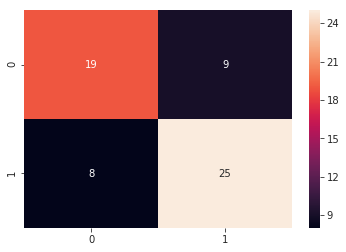

In [63]:
print_metrics(y_test=y_test, y_pred=y_pred)

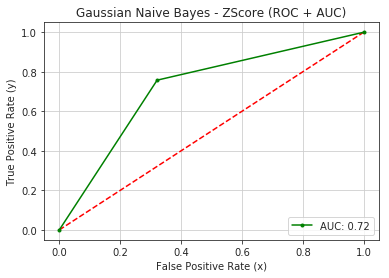

In [64]:
plot_roc(y_test, y_pred, 'Gaussian Naive Bayes - ZScore')

In [65]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/matplotlib/pyplot.py'>

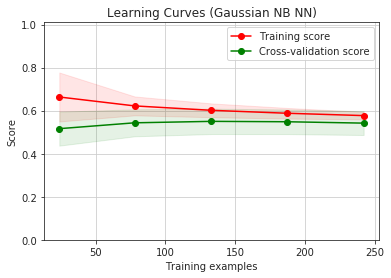

In [73]:
title = "Learning Curves (Gaussian NB NN)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x_values, y_values, ylim=(0.0, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/matplotlib/pyplot.py'>

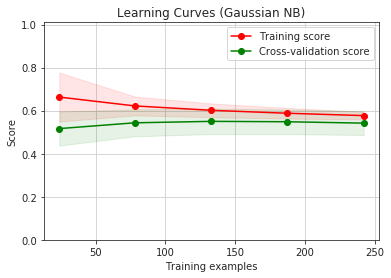

In [78]:
nx_values = sc.fit_transform(x_values)  
#ny_values = sc.fit_transform(y_values)
title = "Learning Curves (Gaussian NB)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, nx_values, ny_values, ylim=(0.0, 1.01), cv=cv, n_jobs=4)

In [79]:
def plot_curve(train_error, test_error):
    plt.plot(np.arange(0,train_error.shape[0]-1), train_error[1:], label = 'train error')
    plt.plot(np.arange(0,train_error.shape[0]-1),test_error[1:], label = 'test error', color= 'green')
    plt.title('Polinomial Complexity Curve')
    plt.xlabel('Polynomial Complexity (x)')
    plt.ylabel('MSE (y)')
    plt.grid()
    plt.legend()
    plt.show() 

    
def obtain_error(x_train, y_train, x_test, y_test):
    m, n = x_train.shape
    train_error = 0
    test_error = 0
    hyp_model = None
    cls_ = GaussianNB().fit(x_train, y_train)
    hyph_train = cls_.predict(x_train)
    hyph_test = cls_.predict(x_test)
    train_error = mean_squared_error(y_train, hyph_train)
    test_error  = mean_squared_error(y_test, hyph_test)
    return train_error, test_error


def create_curve(fs_data, seed):
    train, test = train_test_split(fs_data, test_size=0.2, random_state=seed)
    
    nx_train = train.iloc[:,:-1].values
    ny_train = train.iloc[:,-1].values
    # ---- 
    nx_test = test.iloc[:,:-1].values
    ny_test = test.iloc[:,-1].values
    # ------
    train_error = np.zeros(nx_train.shape[1])
    test_error = np.zeros(nx_train.shape[1])

    n = nx_train.shape[1]
    for i in range(1, n):
        train_error[i], test_error[i] = obtain_error(nx_train[:,0:i], ny_train, nx_test[:,0:i], ny_test)
    plot_curve(train_error, test_error)

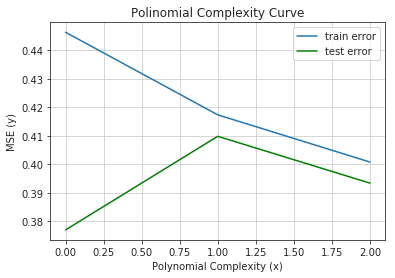

In [80]:
new_data = hd_df[['trestbps', 'restecg', 'chol', 'fbs', 'target']]
create_curve(new_data, seed)